# Pneumonia project 

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
Total_data=tf.keras.utils.image_dataset_from_directory('chest_xray/',batch_size=None,
                                                       color_mode="grayscale",labels="inferred",label_mode='binary')

Found 5856 files belonging to 2 classes.


In [3]:
image_list=[]
label_list=[]
for image, label in Total_data.take(Total_data.cardinality().numpy()):
    image_list.append(image.numpy())
    label_list.append(label.numpy())


In [4]:
#sample 1000 positive and 1000 negative examples from this list, by first splitting the list into positive and negative examples 
label_list_positive=[]
image_list_positive=[]
label_list_negative=[]
image_list_negative=[]
for i in range(len(label_list)):
    if label_list[i]==1:
        label_list_positive.append(label_list[i])
        image_list_positive.append(image_list[i])
    elif label_list[i]==0:
        label_list_negative.append(label_list[i])
        image_list_negative.append(image_list[i])   
    else:
        print('incorrect value in label list')

In [5]:
print(np.shape(label_list_positive),np.shape(label_list_negative))

(4273, 1) (1583, 1)


In [6]:
#create the sampled lists
#these are ordered with positive then negative examples which is not a problem as train test split will shuffle them 
label_list_sample=label_list_positive[0:1500]+label_list_negative[0:1500]
image_list_sample=image_list_positive[0:1500]+image_list_negative[0:1500]

print(np.shape(label_list_sample),np.shape(image_list_sample))

(3000, 1) (3000, 256, 256, 1)


In [7]:
X=np.array(image_list_sample)
y=np.array(label_list_sample)
print(np.shape(X),np.shape(y))

(3000, 256, 256, 1) (3000, 1)


In [8]:
print(y.mean())

0.5


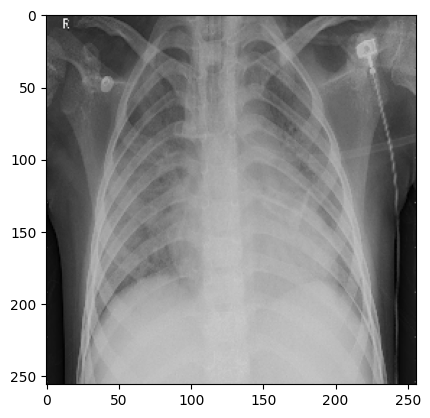

In [9]:
plt.figure()
plt.imshow(X[100,:,:,:],cmap='gray')


## Grayscale to rgb

In [10]:
X_color=np.stack((X[:,:,:,0],)*3, axis=-1)/255


In [11]:
np.shape(X_color)
np.shape(X)

(3000, 256, 256, 1)

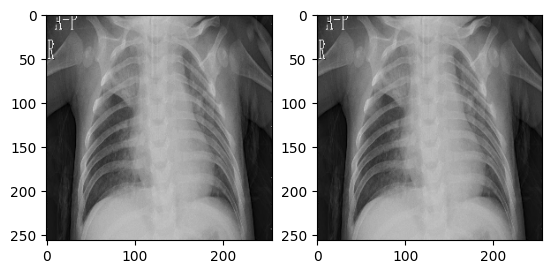

In [12]:
fig,(ax1,ax2)=plt.subplots(1,2)
ax1.imshow(X[1000,:,:,:],cmap='gray')
ax2.imshow(X_color[1000,:,:,:],cmap='gray')




## Train Dev Test split

In [13]:
#60-20-20 split
X_train, X_dev_test, y_train, y_dev_test = train_test_split(X_color, y, test_size=0.4,stratify=y, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_dev_test, y_dev_test, test_size=0.5,stratify=y_dev_test, random_state=42)

In [14]:
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_dev))
print(np.shape(y_dev))
print(np.shape(X_test))
print(np.shape(y_test))

(1800, 256, 256, 3)
(1800, 1)
(600, 256, 256, 3)
(600, 1)
(600, 256, 256, 3)
(600, 1)


In [15]:
np.save('Pneumonia_X_train',X_train)
np.save('Pneumonia_y_train',y_train)

np.save('Pneumonia_X_dev',X_dev)
np.save('Pneumonia_y_dev',y_dev)

np.save('Pneumonia_X_test',X_test)
np.save('Pneumonia_y_test',y_test)